# Step 4. Exploratory data analysis 

We have two datasets: 

1) the one with the data on amount of trips within November 15-16, 2017 with regard to each taxi company name which contains the following columns:
company_name: taxi company name,
trips_amount: the number of rides for each taxi company on November 15-16, 2017.

2) the one with the data on average number of trips ended in Chicago neighborhoods in November 2017 which contains the following columns: 
dropoff_location_name: Chicago neighborhoods where rides ended,
average_trips: the average number of rides that ended in each neighborhood in November 2017.

Our goal to study this information, to identify top 10 neighborhoods in terms of dropoffs, compare these neighborhoods with each other, and compare the companies with each other in terms of nuber of rides. 

## Studying the general information 

In [1]:
# importing libraries 

import pandas as pd 
import re
import numpy as np
!pip install matplotlib -U
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import statsmodels as st
from scipy.stats import mannwhitneyu
from IPython.display import display
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")


Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: matplotlib in /home/jovyan/.local/lib/python3.7/site-packages (3.3.4)


In [2]:
# importing the datasets 

# importing dataset with information on companies

try:
    companies = pd.read_csv('/Users/pavellugovoy/Desktop/data_analysis/Data collection/datasets/project_sql_result_01.csv')

except: 
    companies = pd.read_csv('/datasets/project_sql_result_01.csv')


# importing dataset witn information on neigborhoods

try:
    neighborhoods = pd.read_csv('/Users/pavellugovoy/Desktop/data_analysis/Data collection/datasets/project_sql_result_04.csv')

except: 
    neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')
    


In [3]:
# looking at the general information of companies dataset
display(companies.head(10))
display(companies.tail(10))
display(companies.sample(10))

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


,company_name,trips_amount
54,2192 - 73487 Zeymane Corp,14
55,6057 - 24657 Richard Addo,13
56,5997 - 65283 AW Services Inc.,12
57,Metro Group,11
58,5062 - 34841 Sam Mestas,8
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3
63,3556 - 36214 RC Andrews Cab,2


,company_name,trips_amount
35,6742 - 83735 Tasha Ride Inc,39
54,2192 - 73487 Zeymane Corp,14
42,1085 - 72312 N and W Cab Co,29
52,3721 - Santamaria Express,14
13,Nova Taxi Affiliation Llc,3175
19,Chicago Medallion Leasing INC,1607
59,4053 - 40193 Adwar H. Nikola,7
11,Globe Taxi,4383
9,Blue Ribbon Taxi Association Inc.,5953
31,American United Taxi Affiliation,210


In [4]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
companies.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [6]:
# looking at the general information of neigborhoods dataset
display(neighborhoods.head(10))
display(neighborhoods.tail(10))
display(neighborhoods.sample(10))

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


,dropoff_location_name,average_trips
84,West Pullman,6.466667
85,Montclare,5.766667
86,West Elsdon,5.666667
87,Pullman,3.896552
88,Undef,3.800000
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538
93,Riverdale,1.800000


,dropoff_location_name,average_trips
63,Andersonville,16.866667
65,Ashburn,16.133333
57,Hermosa,27.566667
49,"Sauganash,Forest Glen",43.566667
67,Auburn Gresham,15.166667
40,Bucktown,74.300000
11,East Village,1212.066667
44,Belmont Cragin,59.033333
72,South Chicago,13.000000
39,Jefferson Park,74.333333


In [7]:
neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [8]:
neighborhoods.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


### Conclusion

1) "companies' dataset contains information with regard to 64 companies, it has no missing values, but some of the names of companies contain "strange" digits and hyphens, these are obviously errors, which  may be explained by data collection issues. 

2) 'neighborhoods' dataset contains information with regard to 94 neighborhoods, it has no mising values, but the values related to the number of average trips are of float type with too many digits after "point".

## Data preprocessing

#### Preprocessing 'companies' dataset

In [9]:
# removing numbers from names of companies 

# setting up a function removing the numbers

def remove_digits(data):
    return re.sub('\d*\-*','', data)

# applying the function to the column 'company_name'
companies['company_name'] = companies['company_name'].apply(remove_digits)

# checking the results

display(companies.head(10))
display(companies.tail(10))
display(companies.sample(10))

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


,company_name,trips_amount
54,Zeymane Corp,14
55,Richard Addo,13
56,AW Services Inc.,12
57,Metro Group,11
58,Sam Mestas,8
59,Adwar H. Nikola,7
60,Benny Jona,7
61,Sergey Cab Corp.,5
62,Felman Corp,3
63,RC Andrews Cab,2


,company_name,trips_amount
58,Sam Mestas,8
20,Checker Taxi,1486
34,Norshore Cab,127
18,Seven Taxi,1775
49,Ahzmi Inc,16
40,Babylon Express Inc.,31
63,RC Andrews Cab,2
4,Taxi Affiliation Service Yellow,9299
28,Star Taxi,310
60,Benny Jona,7


In [10]:
# checking the duplicates
companies.duplicated().sum()

0

#### Preprocessing neighborhoods dataset

In [11]:
# rounding up the numbers of average trips and limiting them to two decimals after point

neighborhoods['average_trips']=np.round(neighborhoods['average_trips'],decimals=2)

display(neighborhoods.head(10))
display(neighborhoods.tail(10))
    

,dropoff_location_name,average_trips
0,Loop,10727.47
1,River North,9523.67
2,Streeterville,6664.67
3,West Loop,5163.67
4,O'Hare,2546.90
5,Lake View,2420.97
6,Grant Park,2068.53
7,Museum Campus,1510.00
8,Gold Coast,1364.23
9,Sheffield & DePaul,1259.77


,dropoff_location_name,average_trips
84,West Pullman,6.47
85,Montclare,5.77
86,West Elsdon,5.67
87,Pullman,3.90
88,Undef,3.80
89,Mount Greenwood,3.14
90,Hegewisch,3.12
91,Burnside,2.33
92,East Side,1.96
93,Riverdale,1.80


In [12]:
# checking the duplicates 
neighborhoods.duplicated().sum()

0

### Conclusion

1. Preprocessing 'companies' dataset.

As we  mentioned when studying the general information, the strings in the 'company_name' column had some "strange" digits and hyphens, which were obviously errors due to inccorect data collection, so we decided to remove this signs from the strings using regular expression method. 

2. Preprocessing 'neighborhoods' dataset.

Again, as we figured out on the stage of studying the general information the values related to  the number of average trips were decimals and had to many digits after point, so they were to hard to assess and "read", we decided that rounding up these values up to two digits after point would improve the readability of these number and facilitate further analysis. There were many values which were near to each other and differentiated only by decimal value, so in order not to affect the statistics and the data we decided that it was the right way to keep these values as decimals.  So we rounded up these values to two digits after point keeping them decimals. 

## Data analysis

### Identifying top 10 neighborhoods in terms of drop-offs

In [13]:
topneighborhoods=neighborhoods.sort_values(by='average_trips', ascending=False).head(10)
topneighborhoods

,dropoff_location_name,average_trips
0,Loop,10727.47
1,River North,9523.67
2,Streeterville,6664.67
3,West Loop,5163.67
4,O'Hare,2546.90
5,Lake View,2420.97
6,Grant Park,2068.53
7,Museum Campus,1510.00
8,Gold Coast,1364.23
9,Sheffield & DePaul,1259.77


### Plotting graphs to  compare  neighborhoods and companies  within each other

#### Neighborhoods

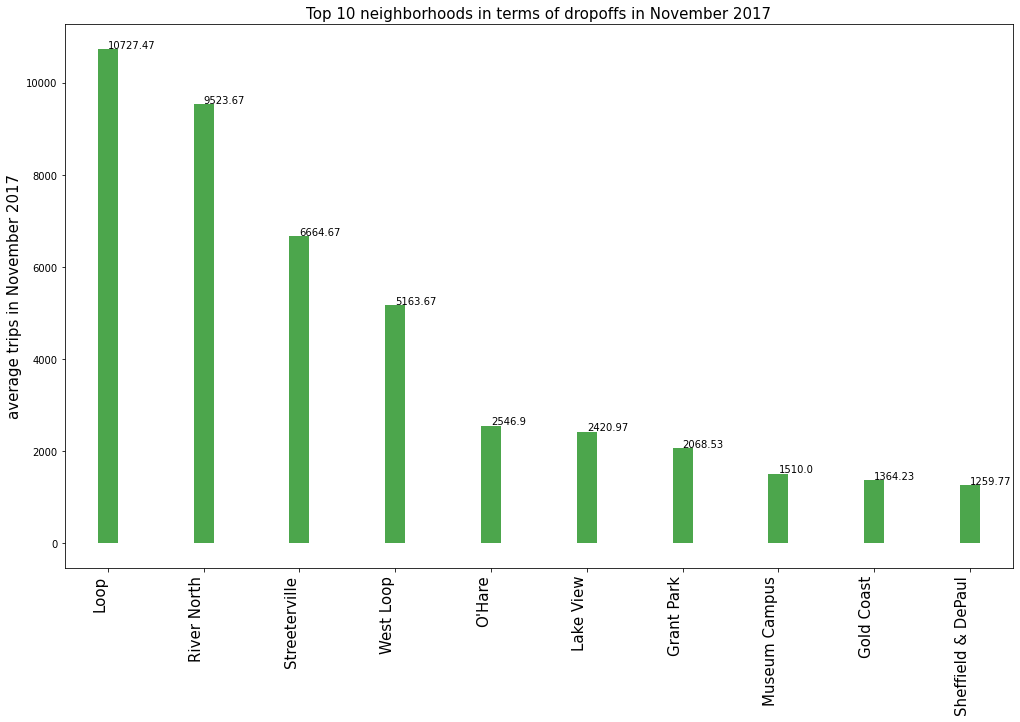

In [14]:
# plotting a chart to compare the top 10 neighborhoods

fig,ax = plt.subplots(figsize=(17,10))

ax.vlines(x=topneighborhoods.dropoff_location_name, 
          ymin=0, 
          ymax=topneighborhoods.average_trips, 
          color ='green', alpha =0.7, linewidth =20)

ax.scatter(x=topneighborhoods.dropoff_location_name, 
           y=topneighborhoods.average_trips, 
           color ='black', s=0, alpha = 0.7)

ax.set_title('Top 10 neighborhoods in terms of dropoffs in November 2017', fontdict={'size':15})

ax.set_ylabel('average trips in November 2017', fontdict={'size':15})

ax.set_xticks(topneighborhoods.dropoff_location_name)
ax.set_xticklabels(topneighborhoods.dropoff_location_name,
                   rotation =90, fontdict={'horizontalalignment':'right', 'size':15})

for row in topneighborhoods.itertuples():
    ax.text(row.dropoff_location_name, row.average_trips+28, s=row.average_trips)


#### Companies

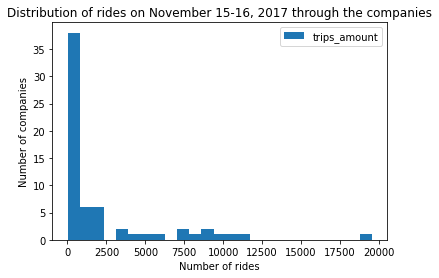

In [15]:
# plotting a histogram to look at the distribution of values before plotting a bar chart to see
companies.plot(kind='hist',bins=25)

plt.title ("Distribution of rides on November 15-16, 2017 through the companies") 
plt.xlabel("Number of rides")
plt.ylabel("Number of companies")
plt.show()

There are many companies and not of them are top companies in terms of number of rides. We need to identify the top companies and compare the others with them. In order to do this we need to find z-score related to the number of rides for each of the companies and identify the ones which are leaders and the "others". 

In [16]:
# finding z-score and adding it to the 'companies' table 

companies['z_score'] = ( (companies['trips_amount']-companies['trips_amount']
                                  .mean())/companies['trips_amount'].std()
                               )

# checking the results

companies.head()


,company_name,trips_amount,z_score
0,Flash Cab,19558,4.567445
1,Taxi Affiliation Services,11422,2.433306
2,Medallion Leasing,10367,2.156570
3,Yellow Cab,9888,2.030925
4,Taxi Affiliation Service Yellow,9299,1.876425


In [17]:
# adding category name to each company name 
# 'other' for all the companies with z-score < 0 
# actual name for other companies

# sclicing dataset for top companies
topcompanies=companies.query('z_score >= 0')

# categorizing companies
companies['category_name'] = (companies['company_name']
                                      .where(companies['company_name']
                                      .isin(topcompanies.company_name), 'other')
                                )
# checking the results
display(companies.query('z_score >= 0'))
display(companies.query('z_score < 0').head())
display(companies.sort_values(by='trips_amount', ascending=False).head(30))
                                 

,company_name,trips_amount,z_score,category_name
0,Flash Cab,19558,4.567445,Flash Cab
1,Taxi Affiliation Services,11422,2.433306,Taxi Affiliation Services
2,Medallion Leasing,10367,2.156570,Medallion Leasing
3,Yellow Cab,9888,2.030925,Yellow Cab
4,Taxi Affiliation Service Yellow,9299,1.876425,Taxi Affiliation Service Yellow
5,Chicago Carriage Cab Corp,9181,1.845473,Chicago Carriage Cab Corp
6,City Service,8448,1.653201,City Service
7,Sun Taxi,7701,1.457257,Sun Taxi
8,Star North Management LLC,7455,1.392729,Star North Management LLC
9,Blue Ribbon Taxi Association Inc.,5953,0.998742,Blue Ribbon Taxi Association Inc.


,company_name,trips_amount,z_score,category_name
16,Blue Diamond,2070,-0.019800,other
17,Chicago Medallion Management,1955,-0.049966,other
18,Seven Taxi,1775,-0.097181,other
19,Chicago Medallion Leasing INC,1607,-0.141249,other
20,Checker Taxi,1486,-0.172988,other


,company_name,trips_amount,z_score,category_name
0,Flash Cab,19558,4.567445,Flash Cab
1,Taxi Affiliation Services,11422,2.433306,Taxi Affiliation Services
2,Medallion Leasing,10367,2.156570,Medallion Leasing
3,Yellow Cab,9888,2.030925,Yellow Cab
4,Taxi Affiliation Service Yellow,9299,1.876425,Taxi Affiliation Service Yellow
5,Chicago Carriage Cab Corp,9181,1.845473,Chicago Carriage Cab Corp
6,City Service,8448,1.653201,City Service
7,Sun Taxi,7701,1.457257,Sun Taxi
8,Star North Management LLC,7455,1.392729,Star North Management LLC
9,Blue Ribbon Taxi Association Inc.,5953,0.998742,Blue Ribbon Taxi Association Inc.


In [18]:
# creating a subset of companies dataset 
# by grouping the data by 'company category' to plot a chart by 

companies_pivot = (companies.pivot_table(index = 'category_name', values='trips_amount', aggfunc='sum')
                   .sort_values(by='trips_amount', ascending=False).reset_index())

# checking the results
companies_pivot

,category_name,trips_amount
0,Flash Cab,19558
1,other,17660
2,Taxi Affiliation Services,11422
3,Medallion Leasing,10367
4,Yellow Cab,9888
5,Taxi Affiliation Service Yellow,9299
6,Chicago Carriage Cab Corp,9181
7,City Service,8448
8,Sun Taxi,7701
9,Star North Management LLC,7455


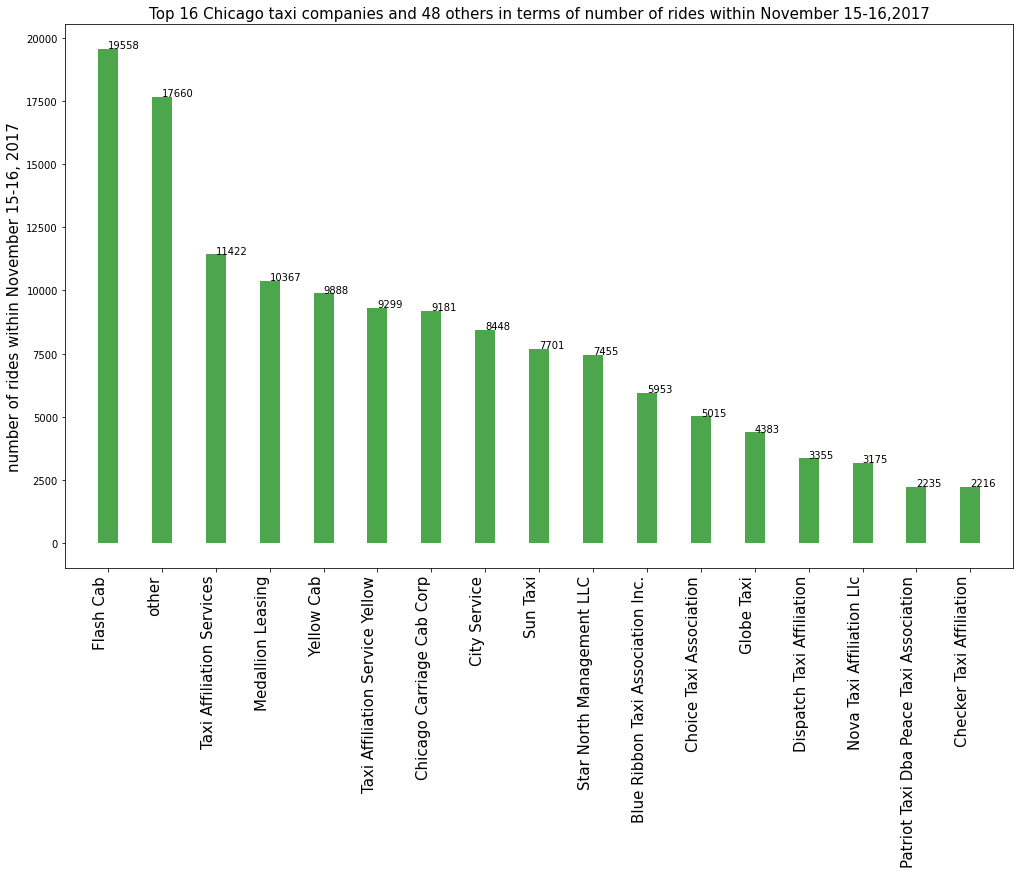

In [19]:
fig,ax = plt.subplots(figsize=(17,10))

ax.vlines(x=companies_pivot.category_name, 
          ymin=0, 
          ymax=companies_pivot.trips_amount, 
          color ='green', alpha =0.7, linewidth =20)

ax.scatter(x=companies_pivot.category_name, 
           y=companies_pivot.trips_amount, 
           color ='black', s=0, alpha = 0.7)

ax.set_title('Top 16 Chicago taxi companies and 48 others in terms of number of rides within November 15-16,2017', fontdict={'size':15})

ax.set_ylabel('number of rides within November 15-16, 2017', fontdict={'size':15})

ax.set_xticks(companies_pivot.category_name)
ax.set_xticklabels(companies_pivot.category_name,
                   rotation =90, fontdict={'horizontalalignment':'right', 'size':15})

for row in companies_pivot.itertuples():
    ax.text(row.category_name, row.trips_amount+28, s=row.trips_amount)

### Conclusion

A. Top 10 neighborhoods
We have found 10 neighborhoods in terms of dropoffs in November, 2017 and here are the results (number of average dropoffs in parenthesis): 
1.	Loop  (10727.47)
2.	River North	(9523.67)
3.	Streeterville	(6664.67)
4.	West Loop	(5163.67)
5.	O'Hare	(2546.90)
6.	Lake View	(2420.97)
7.	Grant Park	(2068.53)
8.	Museum Campus	(1510.00)
9.	Gold Coast	(1364.23)
10.	Sheffield & DePaul	(1259.77)

We have plotted a bar chart to compare these top neighborhoods. We have found that the first four neighborhoods ('Loop', 'River', 'Streeterville', 'West Loop') are the most popular dropoff locations, the fifth and other neighborhoods are significantly less frequent than these ones. And among these leaders the first two locations are signficatly more popular than two others. 

The leadership of Loop is not a surprise, taking into account that Loop is the Chicago downtown, so it is quite predicatble that people go there for work and other needs (tourist attractions, restaurants, shops).

The popularity of River North is also explainable. It is a "art district" with a huge number of shops, restaurants, art galleries and studios, so it is a popular touristic place of interest. There are also many bars and night clubs, which may be also a factor which has an impact on number of taxi rides to this area (usually people need take taxi to go to a night club because the public transport does not operate at the opening hours of a night club).   

The other districts are also popular cultural/business and living areas.

Source: 
1. https://www.niche.com/ 
2. https://www.choosechicago.com/neighborhoods/

B. Taxi companies

As there are 64 taxi company, we have first studied the distribution of number of rides within November 15 and 16 in 2017, and found that the rides are distributed not proportionally: there's a relatively small group of leaders and there are a lot of small taxi companies. So we have decided to categorize in the manner that the small companies would be named "other" while the leaders would be named by their actual name. In order to perform this categorization we have first compared the numbers of rides by finding z-score with regard to each of the companies. This approach has let us figure out that there are 16 companies which we may categorize as leaders (with z-score higher than "0" and in this case with the number of rides greater than 2200 rides), while the other 48 one are small companies (or "other"). We have performed this categorization and then plotted a chart to look at the distribution of the rides within the leaders and the "others".
We have found that the ulitmate leader is the Flash Cab taxi company which made not only more rides than any other taxi company, but also made more rides than all 48 non-leaders. The reason of such leadership may be explained by the fact that this company has the largest fleet in Chicago even for 2021 year. 

Source: 
https://data.cityofchicago.org/Community-Economic-Development/Public-Passenger-Vehicle-Licenses-Taxis-Only/gcze-gasw.  
Note to the source: not all the data in this source seems to be correcltly collected. For example, there's  some confusion in affilation associations and taxi companies (some companies are considered as affiliations, but in fact they are not. Flash Cab has the largest fleet if we take into account only companies, not associations. But to get this result we need to group data not by company name but the affiliation, when we try to retrieve the number of car for each company ('company_name'), we have some strange results) 


# Step 5. Testing hypotheses.

We have a dataset containing information on rides on rides from the Loop neighborhood to O'Hare International Airport. This dataset contains the following  data: 

1. 'start_ts' column -  pickup date and time from the Loop neighborhood. 
2. 'weather_conditions' - weather conditions at the moment the ride started.
3. 'duration_seconds' - ride duration in seconds.

Our goal is to study the following hyphothesis: "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays".




## Studying the general information

In [20]:
# importing dataset

try:
    rides = pd.read_csv('/Users/pavellugovoy/Desktop/data analysis/Data collection/datasets/project_sql_result_07.csv')
except:
    rides = pd.read_csv('/datasets/project_sql_result_07.csv')

In [21]:
# looking at the general information

display(rides.head())
display(rides.tail())
display(rides.sample(5))
display(rides.info())
display(rides.describe())

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


,start_ts,weather_conditions,duration_seconds
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0
1067,2017-11-04 16:00:00,Bad,2834.0


,start_ts,weather_conditions,duration_seconds
527,2017-11-18 05:00:00,Good,1977.0
611,2017-11-11 15:00:00,Good,2700.0
79,2017-11-11 15:00:00,Good,4800.0
836,2017-11-11 07:00:00,Good,1348.0
48,2017-11-04 09:00:00,Good,1560.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


None

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [22]:
# looking at the rows with 0 duration values
rides.query('duration_seconds == 0.0')

,start_ts,weather_conditions,duration_seconds
163,2017-11-11 09:00:00,Good,0.0
168,2017-11-11 07:00:00,Good,0.0
204,2017-11-18 19:00:00,Good,0.0
552,2017-11-04 01:00:00,Good,0.0
801,2017-11-04 09:00:00,Good,0.0
1063,2017-11-25 11:00:00,Good,0.0


### Conclusion

The dataset contains information on 1068 rides. There is no missing values, but there are durations values equal to 0, so they represent rides that didn't actually happen (these may be cancelled rides). Besides that the values related to the duraion are of float type, which seems to be excessive to these values( we don't count the duration up to milliseconds). Also the values related to the date and time of start of a ride are of object type, while these values are actually date and time, so this type is unapproriate. 

## Data preprocessing

In [23]:
# changing data type of duration values from float to integer

rides['duration_seconds']=rides['duration_seconds'].astype('int')

# changing data type of 'start_ts' to datetime type

rides['start_ts'] = pd.to_datetime(rides['start_ts'], format = '%Y-%m-%d %H:%M:%S')

# checking the results

display(rides.head())
display(rides.info())

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null datetime64[ns]
weather_conditions    1068 non-null object
duration_seconds      1068 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 25.2+ KB


None

In [24]:
# removing rows where duration of a ride is 0 

rides=rides.query('duration_seconds != 0')

#checking the results

display(rides.query('duration_seconds == 0'))
display(rides.describe())
display(rides.info())


,start_ts,weather_conditions,duration_seconds


,duration_seconds
count,1062.000000
mean,2083.435970
std,755.651796
min,60.000000
25%,1440.000000
50%,1980.000000
75%,2580.000000
max,7440.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1062 non-null datetime64[ns]
weather_conditions    1062 non-null object
duration_seconds      1062 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 33.2+ KB


None

In [25]:
rides['duration_seconds'].describe()

count    1062.000000
mean     2083.435970
std       755.651796
min        60.000000
25%      1440.000000
50%      1980.000000
75%      2580.000000
max      7440.000000
Name: duration_seconds, dtype: float64

In [26]:
rides.query('duration_seconds <1000')

,start_ts,weather_conditions,duration_seconds
15,2017-11-25 13:00:00,Good,60
203,2017-11-18 00:00:00,Bad,480
424,2017-11-11 13:00:00,Good,420
860,2017-11-04 18:00:00,Bad,480


In [27]:
rides = rides.query('duration_seconds > 60')

In [28]:
# retrieving the day of  week from 'strat_ts' and adding it to a new column 
# to check if all the rows relate to th

rides['dow']=rides['start_ts'].dt.day_name()

# checking the results 

display (rides.head())
display(rides.query('dow != "Saturday"'))


,start_ts,weather_conditions,duration_seconds,dow
0,2017-11-25 16:00:00,Good,2410,Saturday
1,2017-11-25 14:00:00,Good,1920,Saturday
2,2017-11-25 12:00:00,Good,1543,Saturday
3,2017-11-04 10:00:00,Good,2512,Saturday
4,2017-11-11 07:00:00,Good,1440,Saturday


,start_ts,weather_conditions,duration_seconds,dow


In [29]:
# looking for duplicates

rides.duplicated().sum()

197

In [30]:
# removing duplicates
rides.drop_duplicates(inplace =True)

In [31]:
# checking the results
rides.duplicated().sum()

0

### Conclusion

As we figured out before  that there were issues with duration values (wrong data type and 0 values), and the data type of 'start_ts' (date and time) of a ride start was not appropriate. 

We also found that there was one row with duration equal to 60 seconds, which was also strange because it seems to be unreal that one could get from the Loop to O'Hare International airport without a space ship. 
So we changed the data type of the values related to duration of a ride and date and time of a ride.  And We removed the 6 rows with 0 duration values and one row with a duration equal to 60 seconds. We also found that there were 197 duplicates and we removed them. 

Finally, we also doublechecked if all the data relate to the rides on saturday. 

## Performing hypothesis testing

Creating two subsets:
1. one for rides when the weather was bad, 
2. the other one for rides when the weather was good 

In [32]:
# creating subset for rides where the weather was bad

bad_weather_rides = rides.query('weather_conditions == "Bad"')

bad_weather_rides = bad_weather_rides[['duration_seconds']]

# checking the results

display(bad_weather_rides.head())

,duration_seconds
6,2969
30,1980
34,2460
51,2760
52,2460


In [33]:
# creating subset for rides where the weather was good

good_weather_rides = rides.query('weather_conditions == "Good"')
good_weather_rides = good_weather_rides[['duration_seconds']]

# checking the results

display(good_weather_rides.head())


,duration_seconds
0,2410
1,1920
2,1543
3,2512
4,1440


Plotting density histograms for two subsets in order to assess the type of distribution of the values

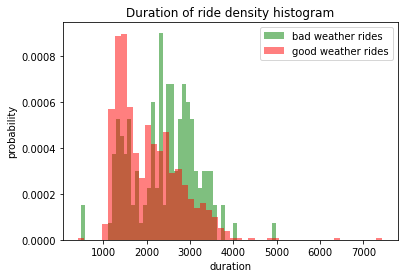

In [34]:
# plotting density histograms for two subsets

kwargs = dict(alpha=0.5, bins=50, density=True, stacked=True)

plt.hist(bad_weather_rides, **kwargs, color ='g', label = 'bad weather rides')
plt.hist(good_weather_rides, **kwargs, color = 'r', label ='good weather rides')
plt.gca().set(title = 'Duration of ride density histogram', 
              ylabel = 'probability', xlabel ='duration')
plt.legend()
plt.show()

The distribution of the values is not normal so it is approriate to use the Mann-Whitney U test, because this test is designed to be used in the case of any kind of distributions. The 'idea' of the test is to valuate the probabilty that the two datasets are taken from the one statistical population. The test enables to compare data samples and gives a suggestion whether we may reject the hypothesis that data samples distributions are the same (and taken from the same statistical population). Taking into account that if the distributions are the same, so the average of values should be the same as well, so we may use this test to test hypothesis as if an average of values related to one statictical population differs from another. Before to perform this test we need first check this data samples for outliers and remove them as they may have impact on the result of the test

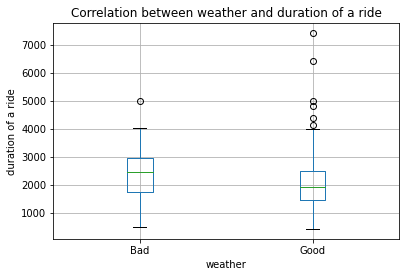

In [35]:
# plotting boxplot with whiskers to find the outliers
rides.boxplot(column = 'duration_seconds', by = 'weather_conditions', return_type = 'axes')
plt.title ("Correlation between weather and duration of a ride")
plt.suptitle("")
plt.xlabel("weather")
plt.ylabel("duration of a ride")
plt.show()

The upper-limit for outliers is equal for two datasets - 4000 seconds. The below-limit is a little bit different same: for bad weather is near 500, for good  weather it is around 400 seconds. We need to remove the outliers because they may have impact on the result of the hypothesis testing.

In [36]:
# removing the outliers from 'bad_weather_rides'

bad_weather_rides_filtd = bad_weather_rides.query('duration_seconds <= 4000 and duration_seconds > 500')

# checking the results

bad_weather_rides_filtd.describe()

,duration_seconds
count,144.000000
mean,2406.819444
std,680.920979
min,1182.000000
25%,1768.250000
50%,2463.500000
75%,2935.500000
max,3779.000000


In [37]:
# removing the outliers from 'good_weather_rides'

good_weather_rides_filtd = good_weather_rides.query('duration_seconds <= 4000 and duration_seconds > 400')

# checking the results

good_weather_rides_filtd.describe()

,duration_seconds
count,710.000000
mean,2024.083099
std,680.573632
min,420.000000
25%,1440.000000
50%,1896.000000
75%,2475.000000
max,3982.000000


Testing hypothesis that the average duration changes on rainy days (i.e where the weather conditions are bad).

H0 is "sample distributions are equal" i.e. distributions of two subsets, and thefore the average durations as well.

H1 is "sample distributions are not equal" i.e. distributions of two subsets, and thefore the average durations as well.

We have choosed standard 0.05 alpha in order to avoid Error Type I or Error Type II.


In [38]:
# comparing samples
stat, p = mannwhitneyu(bad_weather_rides_filtd, good_weather_rides_filtd)
print('Statistics=%.3f, p=%.5f' % (stat, p))


# interpretating
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=34698.000, p=0.00000
Different distribution (reject H0)


### Conclusion

We  have first created two subsets: one for rides when the weather was "Good" and the other one when the weather was "Bad", i.e. rainy or stormy days. We have then  studied the distribution of values in these subsets or, in terms, of hypothesis testing methods, "data samples". The distribution was not "normal". 
So we have decided to use the Mann-Whitney U test because it is appropriate in the case of non-normal distributions. We have had to find the outliers in both samples and to remove them, as they may affect the result of this type of hypothesis test. 

To test the hypothesis in question: "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays" we have figured out the null hypothesis as "sample distributions are equal", it means that the average values, the average duration in our case, are also equal. The alternate hypothesis is "sample distributions are not equal", and it means that the average values are not equal as well. We have decided to choose the standard 0,05 alpha in order to avoid to avoid Error Type I or Error Type II. 

The result of the hypothesis testing is that we should reject the null hypothesis and we have no ground to reject the alternate hypothesis. In other words, it means that we have no ground to reject the statement, that th average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays. 